# LOFAR OPC UA single station imaging

In [13]:
import numpy as np
import os
import re
import getpass
import datetime
import matplotlib.pyplot as plt

In [14]:
from lofarantpos.db import LofarAntennaDatabase
from lofarimaging import read_acm_cube, get_station_type, make_xst_plots

In [15]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [16]:
db = LofarAntennaDatabase()

In [17]:
# Offline alternative
username = getpass.getuser()
data_dir = f"/home/{username}/Documents/LV614_image_data/sess_sid20230111T071252_LV614/scan_59955.30061/LV614_20230111_071256_spw3_sb51_461_int1_dur24300_dir0,0,SUN_xst/"
caltable_dir = f"/home/{username}/Documents/LV614_image_data/CalTables/"
xst_filename = data_dir + "20230111_135702_xst.dat"
# Automate filename to make a video or look for interference

# Read subband from .h file


# Assuming h_filename is already defined
h_filename = xst_filename.replace(".dat", ".h")

# Read the .h file
with open(h_filename, 'r') as file:
    content = file.read()

# Find the subband number using regex
match = re.search(r'--xcsubband=(\d+)', content)
if match:
    subband = int(match.group(1))
else:
    subband = None  # or handle the case where the subband is not found

print("Subband: ", subband)

Subband:  255


In [18]:
station_name = "LV614"
integration_time_s = 2
rcu_mode = 3
height = 1.5
station_type = get_station_type(station_name)
obsdatestr, obstimestr, *_ = os.path.basename(xst_filename).rstrip(".dat").split("_")
obstime = datetime.datetime.strptime(obsdatestr + ":" + obstimestr, '%Y%m%d:%H%M%S')
visibilities = read_acm_cube(xst_filename, station_type)[0]

# sky_fig, ground_fig, leaflet_map = make_xst_plots(cube[0, :, :], station_name, obstime, subband, rcu_mode, subtract=["Cyg A","Cas A", "Sun"])
sky_fig, ground_fig, leaflet_map = make_xst_plots(visibilities, station_name, obstime, subband, rcu_mode, map_zoom=18, outputpath="./results_auto", mark_max_power=True, height=height)


No calibration table found... cube remains uncalibrated!
Maximum of 65.25 dB at -150m east, -74m north of station center (lat/long 57.55622, 21.85241)
DEBUG: Added marker at -150.0 -74.0


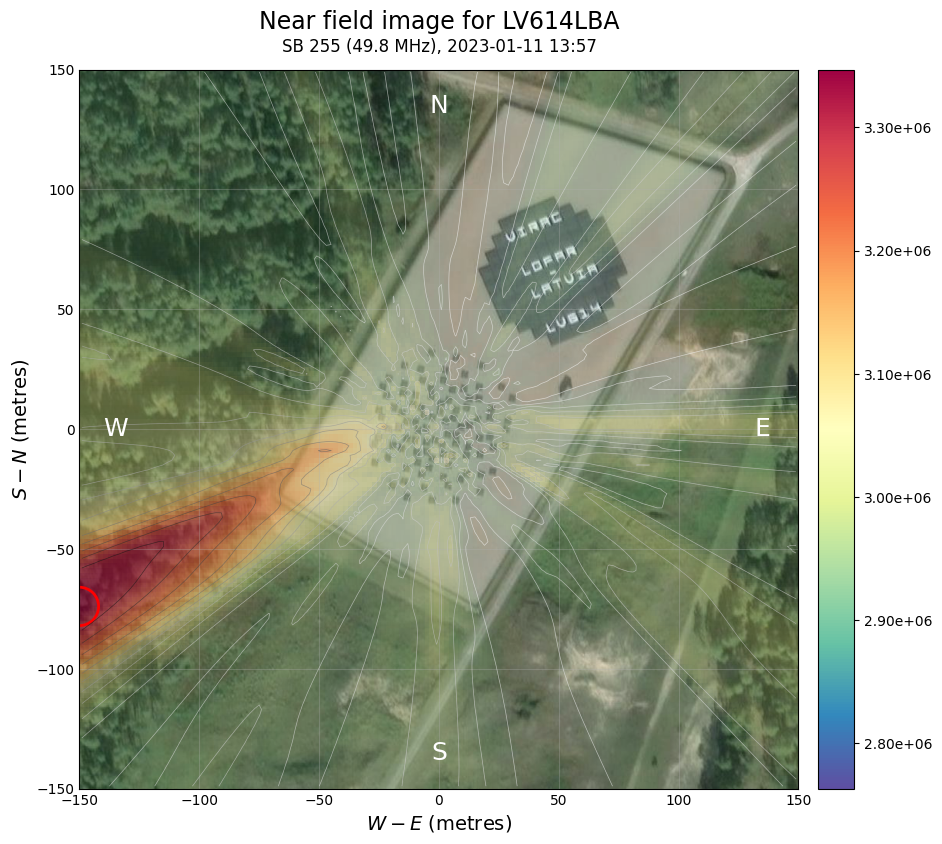

In [19]:
ground_fig

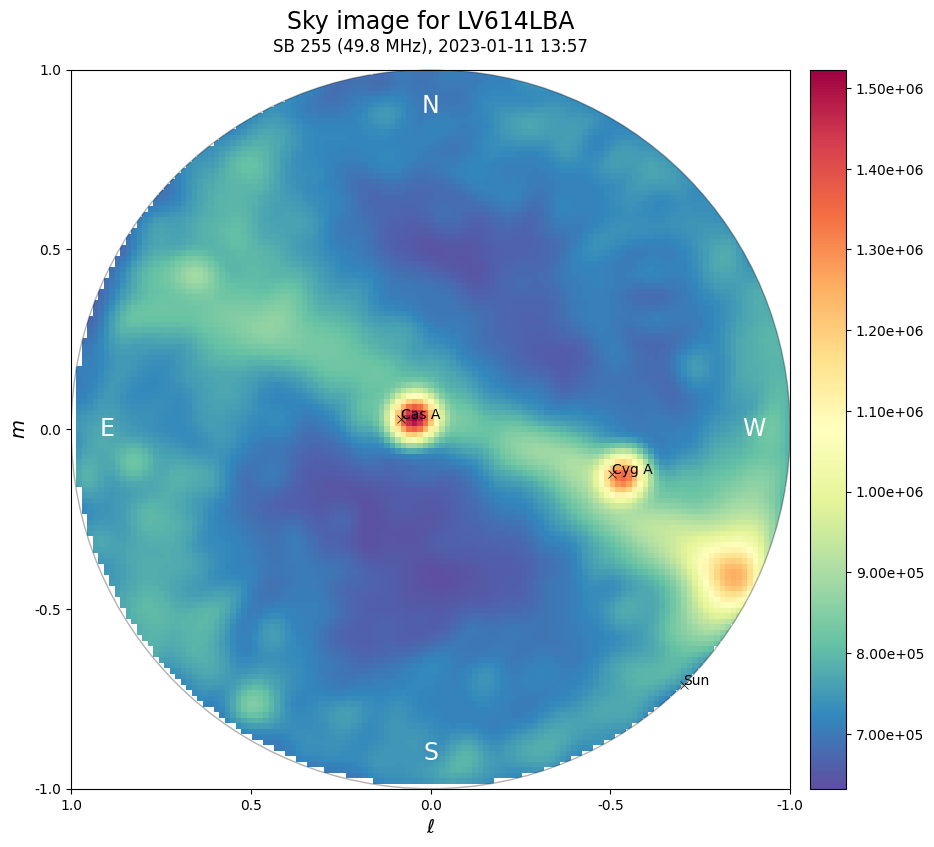

In [20]:
sky_fig


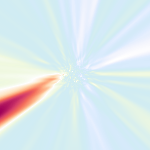

In [21]:
leaflet_map